In [49]:
import pickle
from src.clf.constants import LR_MT_CLASSIFIED, RF_MT_CLASSIFIED, DT_MT_CLASSIFIED, SVM_MT_CLASSIFIED, XGB_MT_CLASSIFIED
from src.clf.constants import LR_MT_MASKED, RF_MT_MASKED, DT_MT_MASKED, SVM_MT_MASKED, XGB_MT_MASKED
from src.clf.constants import TEST_DATA_DIR
from sklearn import set_config

In [2]:
# get access to a folder outside of the src folder
#import os
#os.chdir('..')

In [66]:
# import model and display pipeline
set_config(display='diagram')
model = pickle.load(open(SVM_MT_CLASSIFIED, 'rb'))
model

Pipeline(steps=[('vect', CountVectorizer()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 SVC(C=1, gamma=0.01, probability=True, random_state=42))])

In [18]:
# show criterion of the model
model['clf'].criterion

'entropy'

In [35]:
import pandas as pd
# find directory of the data
import os
df = pd.read_csv(os.path.join(
    "data",
    "processed",
    "nlp",
    "mtsamples",
    "mtsamples_TC.csv",
))

In [37]:
# frequency of the labels
print(df['medical_specialty'].value_counts())
# number of rows
len(df)

 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
Name: medical_specialty, dtype: int64


3010

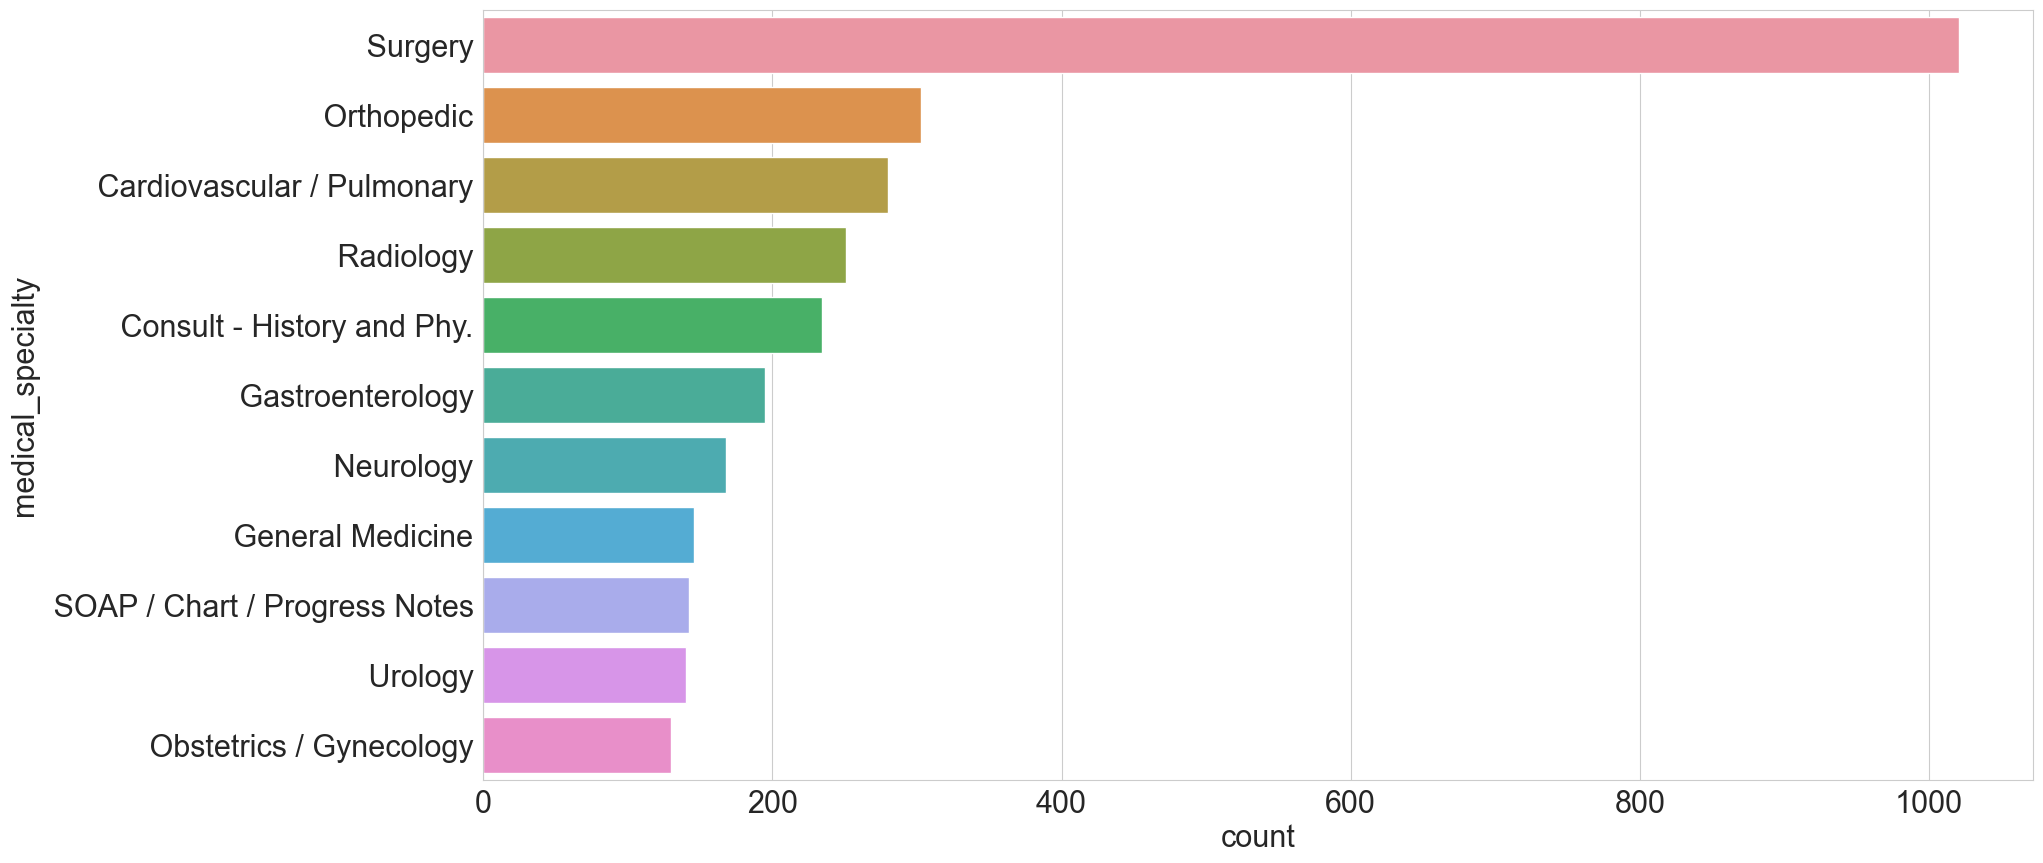

In [45]:
# plot the frequency of the labels with medical speciality 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(y="medical_specialty", data=df, order=df['medical_specialty'].value_counts().index)
plt.rcParams.update({'font.size': 22})
plt.show()

In [46]:
# calculate the accuracy @3 of the model for each label

In [67]:
import os
import numpy as np
test = pd.read_csv(os.path.join(TEST_DATA_DIR))
test = test.dropna()
X_test = test['keywords'].to_list()
y_test = test['medical_specialty'].to_list()

In [68]:
def load_data(filepath) -> tuple[pd.Series, pd.Series]:
    """
    Load data from csv file

    Parameters
    ----------
    filepath : str
        path to csv file

    Returns
    -------
    tuple[pd.Series, pd.Series]
        tuple with X and y
    """
    df = pd.read_csv(filepath)
    df = df.dropna()
    X = df.keywords
    y = df.medical_specialty
    return X, y

In [69]:
X_test, y_test = load_data(TEST_DATA_DIR)

In [72]:
# overall accuracy @3 of the model
k = 3
y_preb_probs = model.predict_proba(X_test)
top = np.argsort(y_preb_probs, axis=1)[:, -k:]
top = np.apply_along_axis(lambda x: model.classes_[x], 1, top)
actual = np.array(y_test).reshape(-1, 1)
np.any(top == actual, axis=1).mean()




0.9011725293132329

In [64]:
def get_top_k_predictions(
    model,
    X_test,
    k,
):
    probs = model.predict_proba(X_test)
    best_n = np.argsort(probs, axis=1)[:, -k:]
    preds = [
        [model.classes_[predicted_cat] for predicted_cat in prediction]
        for prediction in best_n
    ]

    preds = [item[::-1] for item in preds]
    return preds

def collect_preds(Y_test: pd.Series, Y_preds: list[list[str]]) -> list[list[list[str]]]:
    """
    Collect all predictions and ground truth
    Parameters
    ----------
    Y_test : pd.Series
        true labels
    Y_preds : list[list[str]]
        list of machine predictions
    Returns
    -------
     list[list[list[str]]]
        lists of lists (true labels, machine predictions)
    """

    pred_gold_list = [[[Y_test.iloc[idx]], pred] for idx, pred in enumerate(Y_preds)]
    return pred_gold_list

def compute_accuracy(eval_items: list[list[list[str]]]):
    correct = 0

    for item in eval_items:
        true_pred = item[0]
        machine_pred = set(item[1])

        for cat in true_pred:
            if cat in machine_pred:
                correct += 1
                break

    accuracy = correct / float(len(eval_items))
    return accuracy

preds = get_top_k_predictions(model, X_test, 3)
eval_items = collect_preds(y_test, preds)
accuracy = compute_accuracy(eval_items)

In [78]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(model, X_test, y_test)

# feature_names = ['feature1', 'feature2', 'feature3', ...... ]
# features = np.array(feature_names)

# sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

IndexError: tuple index out of range

In [79]:
df_mimic = pd.read_csv(os.path.join("data",
    "processed",
    "nlp",
    "mtsamples",
    "mimic_TC.csv"))

In [80]:
df_mimic.shape

(2, 8)